데이터가 x, y값이고 학습을 통해 변하는 부분이 파라미터이다. 수학에서는 미지수의 계수라고 배웠다. fit를 통해 error를 줄이는 작업을 한다. 구해진 파라미터를 검증하기 위해 최초에 제외했던 데이터 일부로 평가(evaluate)를 한다. 나중에 predict를 통해 입력값만이 주어졌을 때 출력값을 예측한다.  hidden layer를 삽입함으로써 성능을 올려야 한다. 무턱대고 많이 넣는다고 좋은 것은 아니다. 
1. hidden layer의 수 - 그 layer의 node의 수
2. epochs 의 수 = 데이터를 몇 번 돌리느냐의 갯수. epoch가 1이면 1번 데이터를 쓴다. 100회면 100번. 데이터를 
3. activation - non linearity를 부여할 때. hidden layer와 Y에만 부여 할 수 있다. 즉 input layer를 제외한 모든 layer에 가능. 
activation은 다음과 같은 것들이 있다. 
sigmoid(0,1사이로 압축. 0 혹은 1로만 나오게 하는 것은 아니다.)
tanH(sigmoid와 같은데 범위가 -1부터 1이다)
relu(0과 음수는 0으로 출력, 양수는 입력값 그대로 출력 y=x함수처럼
softmax 는 각 layer에 받아지는 값들을 퍼센트로 변환, layer의 노드에 1,2,3이라는 값이 나왔다면 각각 1/6, 2/6, 3/6으로 바꾸는 것.
제일 마지막 layer에 나오는 값이 양자선택이라면 시그모이드를 쓰고, 확률로 나오기를 원한다면 softmax를 쓰고 그런 식이다.


모델이라는 것이 일반식 Y=aX+b를 쓰거나 도식화하는 것을 말한다. 모델을 시작하고, 모델을 만든것을 정의한다. 이것의 이름을 Dense라고 할 것이다. 입력이 몇개이고 출력이 몇개이냐에 따라 모델이 결정된다(그림을 그릴수있다). dense 뒤에 1은 Y의 개수를, input_shape뒤에 1은 X의 개수이다. 만약 x의 개수나 y의 개수가 바뀌면 그 바뀐 숫자를 적으면 된다. 우리가 모델을 만들 때 반드시 모든 입력값과 출력값을 빽빽하게 빠짐없이 연결하라는 법은 없다. 그러나 Dense라고 말한것은 이렇게 입력값과 출력값의 연결(화살표)가 하나도 빠짐없이 연결하라는 의미이다. 머신러닝이 파라미터를 추정하는 것인데, 아무 파라미터를 넣으면 당연히 원래 y값(target)과 실제 output이 차이가 난다. 여기서 타겟과 아웃풋의 차이를 좁히는것이 과제인데, loss는 그 차이를 어떻게 도출할까, optimizer는 어떻게 그 방식으로 차이를 좁힐지의 방법이다. inputshape에서 동그라미의 개수는 두개지만(1까지해서) 원의 개수는 1개이다.

linear. 좌표에 함수가 선이라면 정의역의 개수만큼 치역이 나올것이다. 그런데 현실은 그렇지 않다. 입력은 continous 하게 들어와도 출력은 이를테면 좋다, 싫다라는 두가지로만 분류해야 하는 것이다. 백가지의 다른 입력값이 들어온다고 해서 백가지의 출력값이 나오면 인공지능은 불가한 것이고, 단순히 계산하는 것 뿐인데 이를 좋다 or 싫다 둘 중 한가지로 분류해야 하는 것이다. continous 한 것에서 categorical 한 것으로 가는 것이다. sigmoid 라는 것이 이 과정을 부르는 말이다. sequential 이라는 것은, 화살표가 일방향이라는 것이다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import numpy as np
import matplotlib.pyplot as plt
import tensorflow

기존의 x,y 값 데이터를 불러오기.

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

x train의 경우13개짜리 array가 404개.  x-test의 경우 102개

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(404, 13)
(404,)
(102, 13)


x plot이 13개다 보니 그래프로 나타내지를 못 한다. 그래서 우리는 13개의 x값 중 하나를 고른다. 1번째x값 범죄율부터 13번째x값 lstat까지.

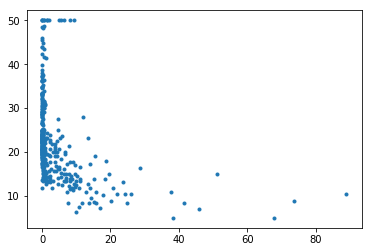

In [4]:
plt.plot(x_train[:,0], y_train, '.')

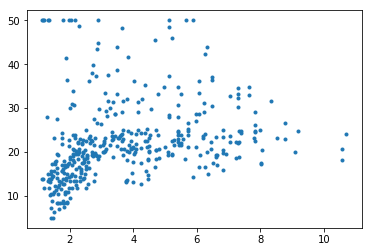

In [5]:
plt.plot(x_train[:,7], y_train, '.')

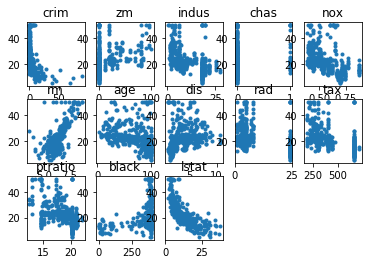

In [6]:
boston_housing = ['crim', 'zm', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

for i in range(13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,i], y_train, '.')
    plt.title(boston_housing[i])
plt.show()

이제 함수를 만들어보자. x는 1부터 13까지 13개, y는 1개. regression에서는 optimizer와 loss는 rmsprom, mse를 쓴다. 비록 x값, 입력 데이터는 13개지만 node의 개수(화살표의 개수)는 14개임을 잊지 말자. 

loss를 줄이기 위해 hidden layer를 삽입했다. 효과가 별로 없어서 non-linearity를 부여했다. 여기서 parameter number (param#) 는 대체 무엇인가? 각 layer에서 layer로 넘어갈 때 화살표의 개수(parameter의 개수)가 Param#인 것이다. hidden layer에서도 1값을 포함하는 node를 붙인다. 이 때 node가 각각 두개인 세 Layer가 A->B(히든)->C 레이어로 넘어간다고 가정할 때, B에도 1 node가 붙기 때문에, A에서 B로 넘어갈 때에는 6개지만 b에서 c로 넘어갈 때에도 4가 아닌 6이 된다는 것이다. classification 이나 regression 중에서 결과값이 어떤 형태로 나오기를 원하는지에 따라 여러가지 함수를 적용할 수 있다.

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=[13],activation = 'relu'))
model.add(Dense(2))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(1))
model.add(Dense(2))
model.add(Dense(13))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 14        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_8 (Dense)              (None, 13)                39        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 14        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_11 (Dense)             (None, 13)                39        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


epochs가 1이면 404개의 데이터(x_train.shape를 해보라)를 1번만 썼다는 뜻이다. 1000이면 404개의 데이터를 1천번 썼다는 것. loss를 줄이는 것이 목표다. hidden layer를 넣어보면? 위로 돌아가면

In [12]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
404/404 [==============================] - 0s 166us/sample - loss: 14.7212
Epoch 2/1000
404/404 [==============================] - 0s 163us/sample - loss: 14.9585
Epoch 3/1000
404/404 [==============================] - 0s 146us/sample - loss: 15.2602
Epoch 4/1000
404/404 [==============================] - 0s 295us/sample - loss: 15.5006
Epoch 5/1000
404/404 [==============================] - 0s 240us/sample - loss: 15.4106
Epoch 6/1000
404/404 [==============================] - 0s 228us/sample - loss: 14.7442
Epoch 7/1000
404/404 [==============================] - 0s 253us/sample - loss: 15.7321
Epoch 8/1000
404/404 [==============================] - 0s 255us/sample - loss: 15.0078
Epoch 9/1000
404/404 [==============================] - 0s 245us/sample - loss: 15.2903
Epoch 10/1000
404/404 [==============================] - 0s 233us/sample - loss: 15.1778
Epoch 11/1000
404/404 [==============================] - 0s 228us/sample - loss: 15.0060
Epoch 12/1000
404/404 [=======

404/404 [==============================] - 0s 102us/sample - loss: 15.0311
Epoch 94/1000
404/404 [==============================] - 0s 102us/sample - loss: 15.6148
Epoch 95/1000
404/404 [==============================] - 0s 99us/sample - loss: 15.0887
Epoch 96/1000
404/404 [==============================] - 0s 82us/sample - loss: 15.5320
Epoch 97/1000
404/404 [==============================] - 0s 94us/sample - loss: 15.2723
Epoch 98/1000
404/404 [==============================] - 0s 87us/sample - loss: 15.3396
Epoch 99/1000
404/404 [==============================] - 0s 92us/sample - loss: 14.8604
Epoch 100/1000
404/404 [==============================] - 0s 79us/sample - loss: 14.6355
Epoch 101/1000
404/404 [==============================] - 0s 89us/sample - loss: 15.1934
Epoch 102/1000
404/404 [==============================] - 0s 79us/sample - loss: 15.8954
Epoch 103/1000
404/404 [==============================] - 0s 87us/sample - loss: 15.0345
Epoch 104/1000
404/404 [================

Epoch 185/1000
404/404 [==============================] - 0s 64us/sample - loss: 14.7302
Epoch 186/1000
404/404 [==============================] - 0s 67us/sample - loss: 15.4243
Epoch 187/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.4097
Epoch 188/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.1869
Epoch 189/1000
404/404 [==============================] - 0s 77us/sample - loss: 15.1540
Epoch 190/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.2766
Epoch 191/1000
404/404 [==============================] - 0s 59us/sample - loss: 15.3364
Epoch 192/1000
404/404 [==============================] - 0s 67us/sample - loss: 14.8948
Epoch 193/1000
404/404 [==============================] - 0s 67us/sample - loss: 15.3516
Epoch 194/1000
404/404 [==============================] - 0s 62us/sample - loss: 14.7308
Epoch 195/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.6974
Epoch 196/1000
404/40

404/404 [==============================] - 0s 69us/sample - loss: 15.9889
Epoch 278/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.0563
Epoch 279/1000
404/404 [==============================] - 0s 82us/sample - loss: 14.7885
Epoch 280/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.1854
Epoch 281/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.7034
Epoch 282/1000
404/404 [==============================] - 0s 77us/sample - loss: 14.9071
Epoch 283/1000
404/404 [==============================] - 0s 74us/sample - loss: 15.3262
Epoch 284/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.6982
Epoch 285/1000
404/404 [==============================] - 0s 72us/sample - loss: 14.9775
Epoch 286/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.1084
Epoch 287/1000
404/404 [==============================] - 0s 64us/sample - loss: 14.5290
Epoch 288/1000
404/404 [============

404/404 [==============================] - 0s 62us/sample - loss: 15.9820
Epoch 370/1000
404/404 [==============================] - 0s 67us/sample - loss: 14.8841
Epoch 371/1000
404/404 [==============================] - 0s 57us/sample - loss: 14.8543
Epoch 372/1000
404/404 [==============================] - 0s 72us/sample - loss: 15.3646
Epoch 373/1000
404/404 [==============================] - 0s 57us/sample - loss: 15.3040
Epoch 374/1000
404/404 [==============================] - 0s 62us/sample - loss: 14.9313
Epoch 375/1000
404/404 [==============================] - 0s 57us/sample - loss: 15.4534
Epoch 376/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.2896
Epoch 377/1000
404/404 [==============================] - 0s 72us/sample - loss: 15.3012
Epoch 378/1000
404/404 [==============================] - 0s 64us/sample - loss: 14.9061
Epoch 379/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.4948
Epoch 380/1000
404/404 [============

Epoch 461/1000
404/404 [==============================] - 0s 77us/sample - loss: 15.0748
Epoch 462/1000
404/404 [==============================] - 0s 72us/sample - loss: 14.6516
Epoch 463/1000
404/404 [==============================] - 0s 74us/sample - loss: 15.2493
Epoch 464/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.0972
Epoch 465/1000
404/404 [==============================] - 0s 69us/sample - loss: 14.7773
Epoch 466/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.0398
Epoch 467/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.1056
Epoch 468/1000
404/404 [==============================] - 0s 62us/sample - loss: 14.9042
Epoch 469/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.8348
Epoch 470/1000
404/404 [==============================] - 0s 77us/sample - loss: 14.5910
Epoch 471/1000
404/404 [==============================] - 0s 59us/sample - loss: 15.1041
Epoch 472/1000
404/40

404/404 [==============================] - 0s 62us/sample - loss: 15.1490
Epoch 554/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.1329
Epoch 555/1000
404/404 [==============================] - 0s 74us/sample - loss: 15.0190
Epoch 556/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.8311
Epoch 557/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.2384
Epoch 558/1000
404/404 [==============================] - 0s 77us/sample - loss: 15.3809
Epoch 559/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.0085
Epoch 560/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.0515
Epoch 561/1000
404/404 [==============================] - 0s 74us/sample - loss: 14.8330
Epoch 562/1000
404/404 [==============================] - 0s 79us/sample - loss: 14.6319
Epoch 563/1000
404/404 [==============================] - 0s 72us/sample - loss: 15.4456
Epoch 564/1000
404/404 [============

404/404 [==============================] - 0s 69us/sample - loss: 15.3123
Epoch 646/1000
404/404 [==============================] - 0s 69us/sample - loss: 14.7968
Epoch 647/1000
404/404 [==============================] - 0s 74us/sample - loss: 15.2482
Epoch 648/1000
404/404 [==============================] - 0s 77us/sample - loss: 14.8960
Epoch 649/1000
404/404 [==============================] - 0s 67us/sample - loss: 14.9007
Epoch 650/1000
404/404 [==============================] - 0s 77us/sample - loss: 15.4870
Epoch 651/1000
404/404 [==============================] - 0s 82us/sample - loss: 14.9899
Epoch 652/1000
404/404 [==============================] - 0s 69us/sample - loss: 14.3820
Epoch 653/1000
404/404 [==============================] - 0s 77us/sample - loss: 15.0823
Epoch 654/1000
404/404 [==============================] - 0s 74us/sample - loss: 15.6087
Epoch 655/1000
404/404 [==============================] - 0s 69us/sample - loss: 14.9054
Epoch 656/1000
404/404 [============

Epoch 737/1000
404/404 [==============================] - 0s 59us/sample - loss: 15.6056
Epoch 738/1000
404/404 [==============================] - 0s 77us/sample - loss: 15.2165
Epoch 739/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.1002
Epoch 740/1000
404/404 [==============================] - 0s 72us/sample - loss: 14.4898
Epoch 741/1000
404/404 [==============================] - 0s 74us/sample - loss: 15.1771
Epoch 742/1000
404/404 [==============================] - 0s 67us/sample - loss: 15.3045
Epoch 743/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.4234
Epoch 744/1000
404/404 [==============================] - 0s 72us/sample - loss: 15.3472
Epoch 745/1000
404/404 [==============================] - 0s 69us/sample - loss: 15.6261
Epoch 746/1000
404/404 [==============================] - 0s 74us/sample - loss: 15.1374
Epoch 747/1000
404/404 [==============================] - 0s 62us/sample - loss: 14.9806
Epoch 748/1000
404/40

404/404 [==============================] - 0s 64us/sample - loss: 15.0677
Epoch 830/1000
404/404 [==============================] - 0s 74us/sample - loss: 14.9907
Epoch 831/1000
404/404 [==============================] - 0s 77us/sample - loss: 15.5228
Epoch 832/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.2780
Epoch 833/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.0435
Epoch 834/1000
404/404 [==============================] - 0s 62us/sample - loss: 15.0225
Epoch 835/1000
404/404 [==============================] - 0s 72us/sample - loss: 15.6658
Epoch 836/1000
404/404 [==============================] - 0s 64us/sample - loss: 14.7782
Epoch 837/1000
404/404 [==============================] - 0s 67us/sample - loss: 15.5939
Epoch 838/1000
404/404 [==============================] - 0s 64us/sample - loss: 14.7249
Epoch 839/1000
404/404 [==============================] - 0s 59us/sample - loss: 15.1502
Epoch 840/1000
404/404 [============

404/404 [==============================] - 0s 59us/sample - loss: 14.8317
Epoch 922/1000
404/404 [==============================] - 0s 62us/sample - loss: 14.5846
Epoch 923/1000
404/404 [==============================] - 0s 57us/sample - loss: 15.0049
Epoch 924/1000
404/404 [==============================] - 0s 59us/sample - loss: 15.3859
Epoch 925/1000
404/404 [==============================] - 0s 64us/sample - loss: 14.9919
Epoch 926/1000
404/404 [==============================] - 0s 59us/sample - loss: 15.7201
Epoch 927/1000
404/404 [==============================] - 0s 64us/sample - loss: 14.8854
Epoch 928/1000
404/404 [==============================] - 0s 67us/sample - loss: 15.0541
Epoch 929/1000
404/404 [==============================] - 0s 67us/sample - loss: 15.5119
Epoch 930/1000
404/404 [==============================] - 0s 57us/sample - loss: 14.8757
Epoch 931/1000
404/404 [==============================] - 0s 64us/sample - loss: 15.8209
Epoch 932/1000
404/404 [============

평가(상품화) 얼마나 error를 좁히는데 성공했는지

In [13]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 3ms/sample - loss: 30.5186


30.51855588426777

In [14]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

model.predict(np.array([0, 1, 50, 1, 0, 5, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[645.85535, 645.89923, 645.8992 , 645.9731 , 645.90393, 645.93286,
        645.8604 , 645.91046, 645.98627, 645.96045, 645.8699 , 645.9186 ,
        645.93835]], dtype=float32)